In [2]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
import numpy as np
import warnings
plots.style.use('fivethirtyeight')
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
def bootstrapped_statistics(original_sample,variable,quantity_function):
    
    bootstrap_stats = make_array()
    for i in np.arange(5000):
        next_bs_sample = original_sample.sample(k = original_sample.num_rows, with_replacement = True)
        bootstrap_stats = np.append(bootstrap_stats, 
                                   quantity_function(next_bs_sample.column(variable)))

    return bootstrap_stats

In [4]:
def bootstrap_confidence_interval(original_sample,variable,quantity_function, confidence_level):

    bootstrap_stats = bootstrapped_statistics(original_sample,variable,quantity_function)
    
    left = percentile((100-confidence_level)/2, 
                      bootstrap_stats)
    
    right = percentile(100 - (100-confidence_level)/2, 
                       bootstrap_stats)

    return make_array(left, right)

## Review

In slides.

## New material

We again consider the 2019 SF City workers compensation table dataset to be a **population**  for teaching purposes. In general, when using the inference method of today, you will not have the population: only a (random) sample from it.

In [5]:
population = Table.read_table('san_francisco_2019.csv')
min_salary = 15 * 20 * 50
population = population.where('Salary', are.above(min_salary))

In [6]:
population_median = percentile(50, population.column('Total Compensation'))
population_median

135747.0

### What does _x_% confidence mean?

You do not need to worry about understanding the mechanics of the plotting code in this section.

In [7]:
def confidence_interval_95_display(sample_size):
    
    original_sample = population.sample(sample_size, with_replacement=False)
    
    bootstrap_stats = make_array()
    for i in np.arange(1000):
        next_bs_sample = original_sample.sample(k = original_sample.num_rows, with_replacement = True)
        bootstrap_stats = np.append(bootstrap_stats, 
                                   percentile(50,next_bs_sample.column('Total Compensation')))

    left = percentile(2.5, bootstrap_stats)
    
    right = percentile(97.5, 
                       bootstrap_stats)
    
    return make_array(left, right)


In [8]:
confidence_interval_95_display(2)

array([ 130568.,  132517.])

In [9]:
intervals = Table(['lower', 'upper'])

for i in np.arange(100):
    interval = confidence_interval_95_display(100)
    intervals = intervals.with_row([
            interval.item(0), interval.item(1)
        ])
intervals = intervals.with_columns('Number', np.arange(100) + 1)

In [10]:
intervals.show(5)

lower,upper,Number
117970,158085,1
110254,131107,2
125319,148967,3
120347,151870,4
116158,137791,5


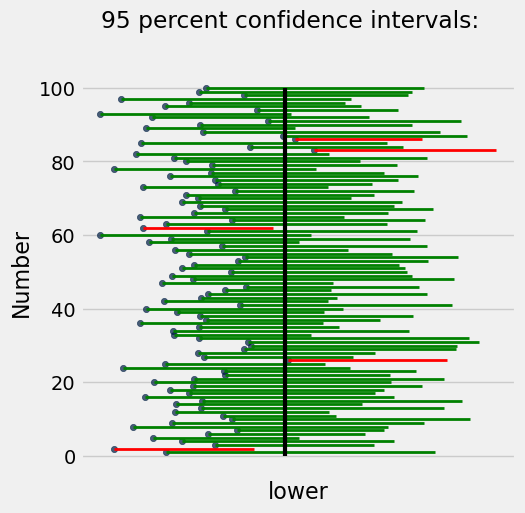

In [15]:
intervals.scatter('lower','Number')
plots.xticks(np.arange(0))
truth = population_median
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'green'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('Number'), row.item('Number')),
               color, lw=2)
plots.plot((truth, truth), (0, intervals.num_rows), color='black', lw=3);
plots.suptitle('95 percent confidence intervals:', y = 1)
# plots.title('We expect around \n 95 of the 100 intervals to cover the true parameter')
plots.show();

### How does *sample size* affect the confidence interval?

You do not need to worry about understanding the mechanics of the plotting code in this section.

In [16]:
intervals = Table(['Number', 'lower', 'upper', 'sample_size'])

for n in [10, 20, 30, 50]:
    for k in np.arange(intervals.num_rows, intervals.num_rows + 20):
        interval = confidence_interval_95_display(n)
        intervals = intervals.with_row([
            k, interval.item(0), interval.item(1), n
        ])

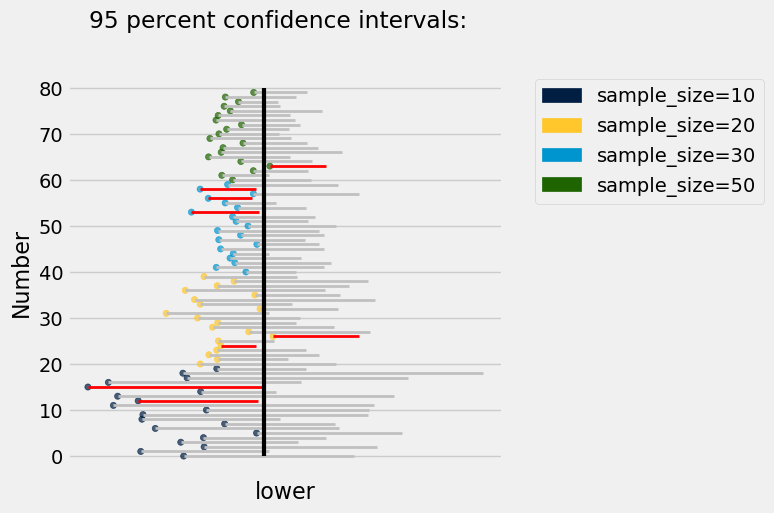

In [18]:
intervals.scatter('lower', 'Number', group='sample_size')
plots.xticks(np.arange(0))
truth = population_median
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'silver'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('Number'), row.item('Number')),
               color, lw=2)
plots.plot((truth, truth), (0, intervals.num_rows), color='black', lw=3);
plots.suptitle('95 percent confidence intervals:', y = 1)
# plots.title('The larger the sample size, \n the smaller the width!')
plots.show();

### How does *confidence level* affect the confidence interval?

You do not need to worry about understanding the mechanics of the plotting code in this section.

In [19]:
def confidence_interval_sample_30_display(confidence_level):
    
    original_sample = population.sample(30, with_replacement=False)
    
    bootstrap_stats = make_array()
    for i in np.arange(1000):
        next_bs_sample = original_sample.sample(k = original_sample.num_rows, with_replacement = True)
        bootstrap_stats = np.append(bootstrap_stats, 
                                   percentile(50,next_bs_sample.column('Total Compensation')))

    left = percentile((100-confidence_level)/2, bootstrap_stats)
    
    right = percentile(100 - (100-confidence_level)/2, 
                       bootstrap_stats)
    
    return make_array(left, right)


In [20]:
intervals = Table(['Number', 'lower', 'upper', 'conf_level'])

for n in [80, 85, 90, 95]:
    for k in np.arange(intervals.num_rows, intervals.num_rows + 20):
        interval = confidence_interval_sample_30_display(n)
        intervals = intervals.with_row([
            k, interval.item(0), interval.item(1), n
        ])

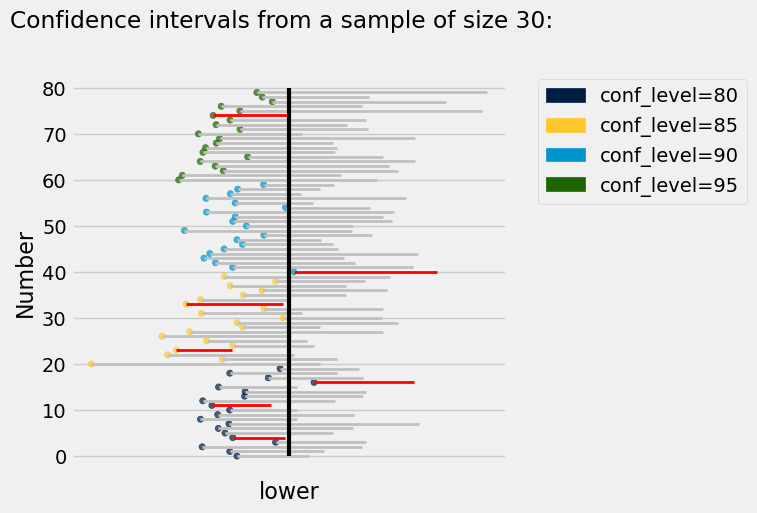

In [22]:
intervals.scatter('lower', 'Number', group='conf_level')
plots.xticks(np.arange(0))
truth = population_median
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'silver'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('Number'), row.item('Number')),
               color, lw=2)
plots.plot((truth, truth), (0, intervals.num_rows), color='black', lw=3);
plots.suptitle('Confidence intervals from a sample of size 30:', y = 1)
# plots.title('The larger the conf level, \n the larger the width!')
plots.show();

______

### Make sure you interpret the confidence interval correctly!

In [23]:
births = Table.read_table('baby.csv')
births.show(6)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False


In [24]:
plots.style.use('fivethirtyeight')

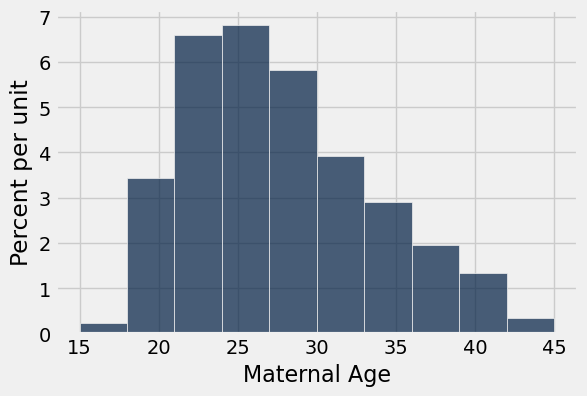

In [25]:
births.hist('Maternal Age')
plots.show()

In [26]:
np.average(births.column('Maternal Age'))

27.228279386712096

**Task**: Find a 95 percent confidence interval for the average age of all mothers whose babies are born in this hospital system.

In [27]:
bootstrapped_means = bootstrapped_statistics(births,'Maternal Age', np.average)

In [28]:
make_array(percentile(2.5,bootstrapped_means),percentile(97.5,bootstrapped_means))

array([ 26.88586031,  27.56473595])

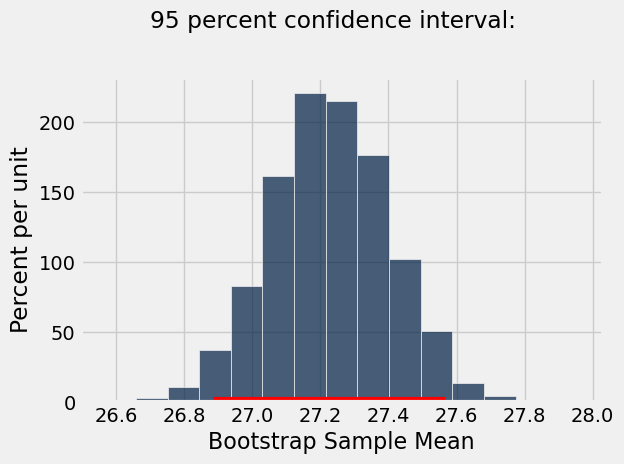

In [31]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bootstrapped_means
)
resampled_means.hist(bins=15)
plots.plot([percentile(2.5,bootstrapped_means), 
            percentile(97.5,bootstrapped_means)], [0, 0], color='red', lw=8);
plots.suptitle('95 percent confidence interval:', y = 1.05)
# plots.title("This time, we don't know whether we have covered \n the true value!")
plots.show();

### Confidence intervals can be used for hypothesis testing!

**Discussion Hypothesis Test Setup**: 

- Null hypothesis: The average age of mothers in the population is 27 years; the random sample average is different due to chance.

- Alternative hypothesis: The average age of the mothers in the population is not 27 years.

- *p*-value cutoff: 5% 


### The bootstrap method is not perfect!

- Back to the SF compensation table. Again, we have the population parameter, so we can use this to see how the bootstrap might fail.

- Here are a few of the cases which were discussed in the slides.

#### Potential failure case: quantity is calculated from rare subjects of the population 

In [32]:
population_max = np.max(population.column('Total Compensation'))
population_max

724031.0

In [33]:
sample_size = 400
original_sample = population.sample(sample_size, with_replacement=False)

In [34]:
bootstrap_confidence_interval(original_sample,'Total Compensation', np.max, 95)

array([ 322463.,  401730.])

#### Potential failure case: original sample size is too small

In [38]:
population_mean = np.average(population.column('Total Compensation'))
population_mean

142675.017788319

In [39]:
sample_size = 5
original_sample = population.sample(sample_size, with_replacement=False)

In [42]:
bootstrap_confidence_interval(original_sample,'Total Compensation', np.average, 95)

array([ 117882. ,  246638.2])